## Access Radar Rottnest Shelf Wind Delayed QC data in Zarr
A jupyter notebook to show how to access and plot the AODN radar_RottnestShelf_wind_delayed_qc dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/5ad9a6da-3f0b-4b2f-8212-48b386e1b98c).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/radar_RottnestShelf_wind_delayed_qc.ipynb).

In [1]:
dataset_name = "radar_RottnestShelf_wind_delayed_qc"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 20ms


✅ Local version 0.2.2 is up to date (remote: 0.2.2)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 465 ms, sys: 51.4 ms, total: 516 ms
Wall time: 1.08 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	LATITUDE = 92 ;
	LONGITUDE = 62 ;
	TIME = 65735 ;

variables:
	float64 LATITUDE(LATITUDE) ;
		LATITUDE:axis = Y ;
		LATITUDE:long_name = latitude ;
		LATITUDE:reference_datum = geographical coordinates, WGS84 datum ;
		LATITUDE:standard_name = latitude ;
		LATITUDE:units = degree_north ;
		LATITUDE:valid_max = 90.0 ;
		LATITUDE:valid_min = -90.0 ;
	float64 LONGITUDE(LONGITUDE) ;
		LONGITUDE:axis = X ;
		LONGITUDE:long_name = longitude ;
		LONGITUDE:reference_datum = geographical coordinates, WGS84 datum ;
		LONGITUDE:standard_name = longitude ;
		LONGITUDE:units = degree_east ;
		LONGITUDE:valid_max = 180.0 ;
		LONGITUDE:valid_min = -180.0 ;
	datetime64[ns] TIME(TIME) ;
		TIME:axis = T ;
		TIME:comment = Given time lies at the middle of the 1 hour averaging period. ;
		TIME:local_time_zone = 8.0 ;
		TIME:long_name = time ;
		TIME:standard_name = time ;
		TIME:valid_max = 999999.0 ;
		TIME:valid_min = 0.0 ;
	float64 WDIR(TIME, LATITUDE, LONGITUDE) ;
		WDIR:

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2010-04-01 00:30:00'), Timestamp('2019-06-07 10:30:00'))

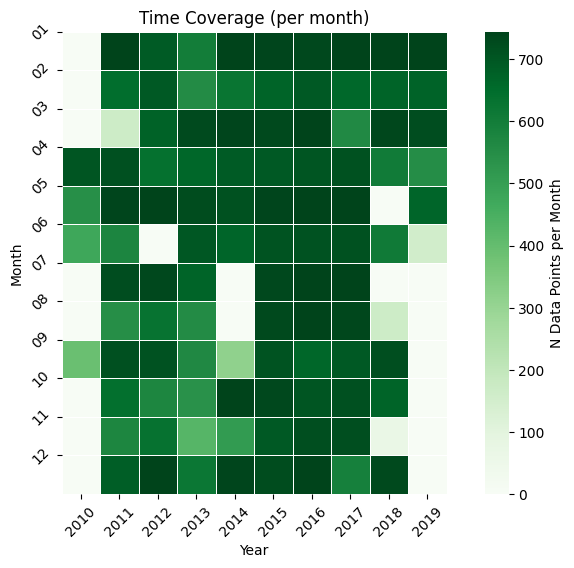

In [7]:
aodn_dataset.plot_time_coverage()

## Plot a gridded variable

2025-06-12 13:13:44,170 - aodn.GetAodn - INFO - Plotting 'Direction towards which the wind is blowing based on short wave direction' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2532: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


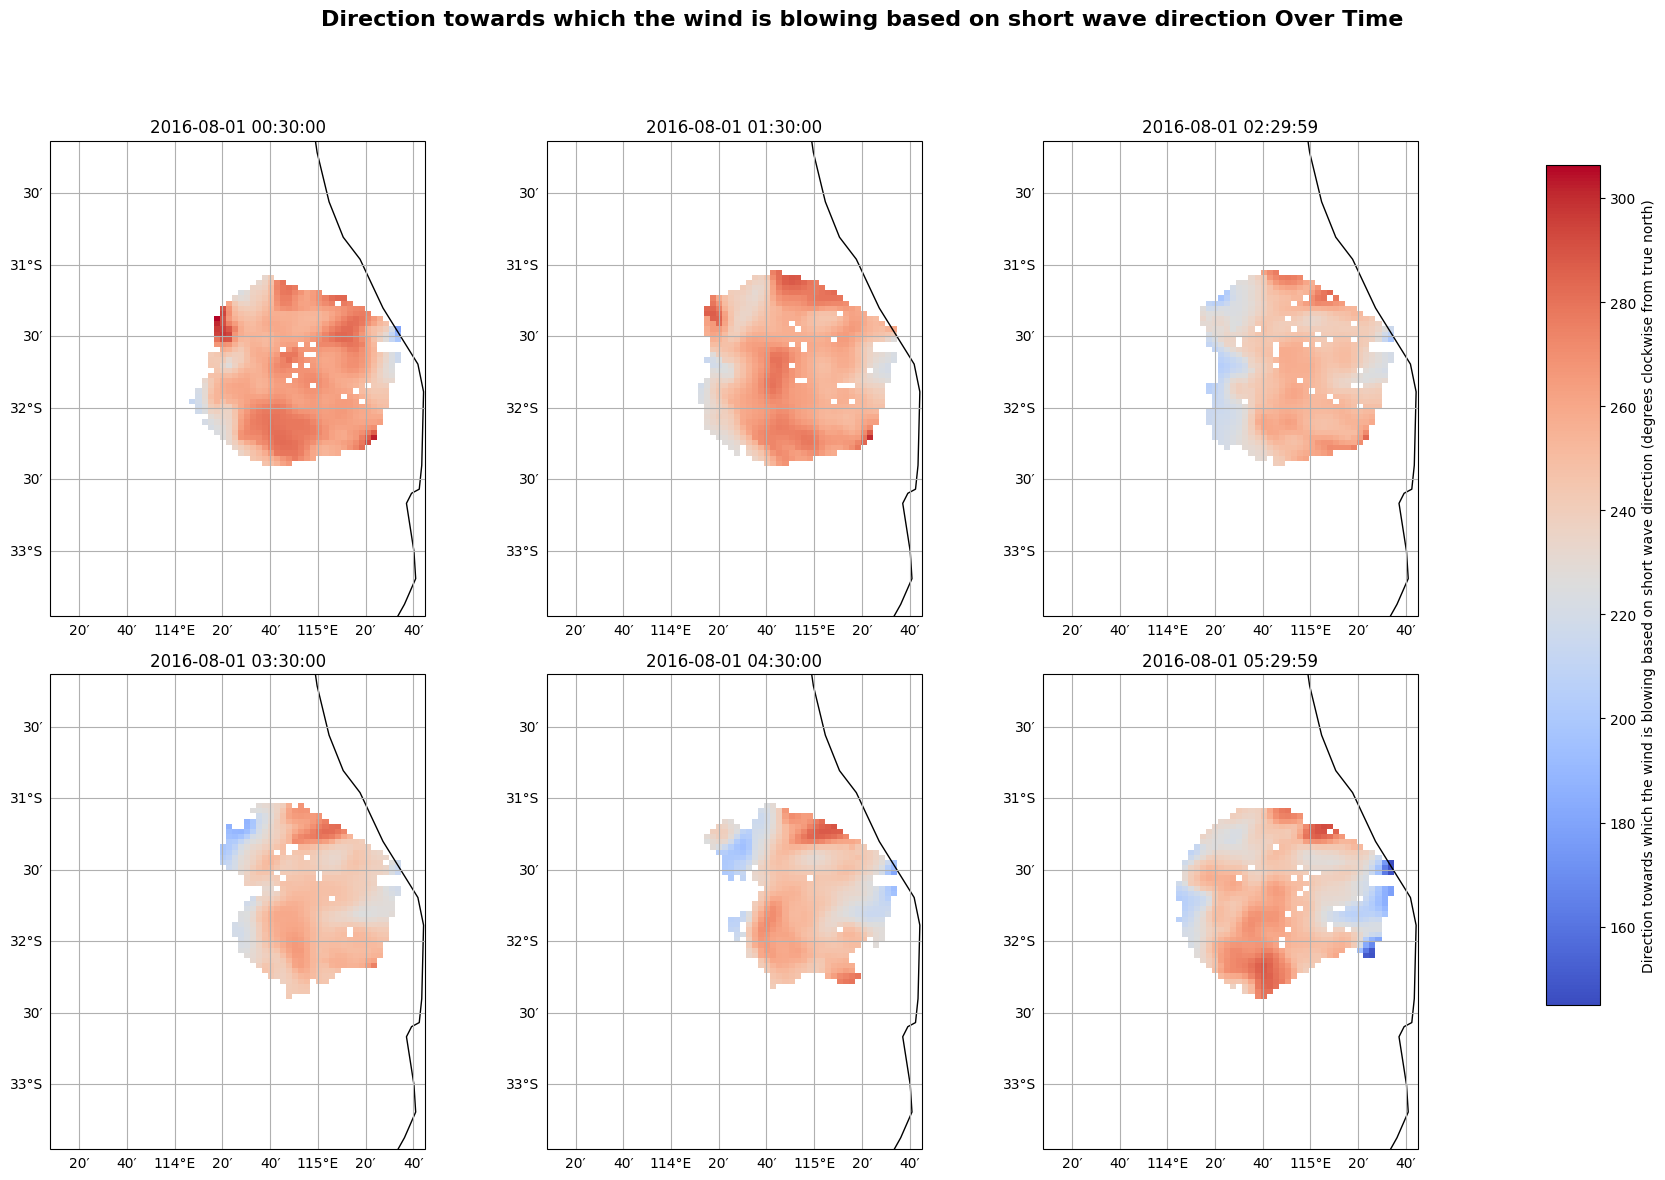

CPU times: user 3.03 s, sys: 1.68 s, total: 4.71 s
Wall time: 3.8 s


In [8]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='WDIR', 
                                                    date_start='2016-08-01', 
                                                    n_days=6, 
                                                    coastline_resolution="50m", 
                                                    )